In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#from category_encoders import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
raw_data_tr = pd.read_csv('train.csv')
raw_data_te = pd.read_csv('test_bqCt9Pv.csv')

In [3]:
raw_data_tr.head(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   
5    518279             54513       61900  89.66         67        22807   
6    529269             46349       61500  76.42         67        22807   
7    510278             43894       61900  71.89         67        22807   
8    490213             53713       61973  89.56         67        22807   
9    510980             52603       61300  86.95         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   
5               45                1501      08-09-90   Self employed   
6               45                1502      01-06-88        Salaried   
7               45                1501      04-10-89        Salaried   
8               45                1497      15-11-91   Self employed   
9               45                1492      01-06-68        Salaried   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   
2      ...                          0                     0   
3      ...                          0                     0   
4      ...                          0                     0   
5      ...                          0                     0   
6      ...                          0                     0   
7      ...                          0                     0   
8      ...                          0                     0   
9      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   
5                1347               0                             0   
6                   0               0                             0   
7                   0               0                             0   
8                   0               0                             0   
9                2608               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   
5                                    0         1yrs 9mon   
6                                    0         0yrs 0mon   
7                                    0         0yrs 2mon   
8                                    0         4yrs 8mon   
9                                    0         1yrs 7mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3   

In [4]:
raw_data_te.tail(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
112382    669006             46849       72509  68.96         74        16646   
112383    708464             55243       75122  78.54         74        16646   
112384    762274             44109       68136  70.45         74        16646   
112385    767673             53303       72509  78.61         74        16646   
112386    743207             50683       68136  79.25         74        16646   
112387    755547             44875       72509  67.58         74        16646   
112388    716994             53549       72509  78.61         74        16646   
112389    709352             55243       72509  81.37         74        16646   
112390    699795             55243       72509  81.37         74        16646   
112391    755244             40274       72509  60.68         74        16646   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
112382               86                2591      01-01-82   Self employed   
112383               86                2611      05-06-67   Self employed   
112384               86                2578      10-01-89   Self employed   
112385               86                2605      01-01-96   Self employed   
112386               86                2593      01-01-76   Self employed   
112387               86                2591      14-05-92   Self employed   
112388               86                2593      24-04-84   Self employed   
112389               86                2593      01-01-86   Self employed   
112390               86                2593      01-01-73   Self employed   
112391               86                2593      01-01-74   Self employed   

             ...        SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
112382       ...                          0                      0   
112383       ...                          0                      0   
112384       ...                          0                      0   
112385       ...                          0                      0   
112386       ...                          0                      0   
112387       ...                          0                      0   
112388       ...                          0                      0   
112389       ...                          0                      0   
112390       ...                          0                      0   
112391       ...                          0                      0   

        SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  \
112382                     0                   0               0   
112383                     0                   0               0   
112384                     0                   0               0   
112385                     0                   0               0   
112386                     0                8350               0   
112387                     0                   0               0   
112388                     0                   0               0   
112389                     0                   0               0   
112390                     0                   0               0   
112391                     0                   0               0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
112382                             0                                    0   
112383                             0                                    1   
112384                             0                                    0   
112385                             0                                    0   
112386                             0                                    0   
112387                             0                                    0   
112388                             0                                    0   
112389                             0                                    0   
112390                             1                   

In [5]:
project_data_tr = raw_data_tr
project_data_te = raw_data_te

In [6]:
project_data_tr.head(2)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  

[2 rows x 41 columns]

In [7]:
project_data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

# EDA

In [8]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()


In [9]:
project_data_tr['label'] = project_data_tr.apply(lambda x : 1 if x['loan_default'] > 0.8 else 0, axis=1)

In [10]:
len(project_data_tr[project_data_tr['label'] == 0])

182543

In [11]:
y = project_data_tr['label']

In [12]:
project_data_tr.drop(['loan_default'], axis=1, inplace=True)

In [13]:
project_data_tr['Employment.Type'].fillna('Unemployed', inplace = True)
project_data_te['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", project_data_tr.isnull().sum().sum())
print("Null values left in the test set:", project_data_te.isnull().sum().sum())



Null values left in the train set: 0
Null values left in the test set: 0


### test & Train concat

In [14]:
data = pd.concat([project_data_tr, project_data_te], axis = 0, ignore_index=True)

In [15]:
data.shape

(345546, 41)

# Data Preprocessing

### Date Formatting to age

In [16]:
#from datetime import datetime
import datetime

def dateFormatChange(date) :
    d = datetime.datetime.strptime(date, '%d-%m-%y')
    if d.year > 2000 :
        d = d.replace(year=d.year-100)
        
    return d.strftime('%d-%m-%Y')


In [17]:
#from datetime import datetime
import datetime

def calculate_age(born):
    born = datetime.datetime.strptime(born, "%d-%m-%Y").date()
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


In [18]:
from datetime import datetime
import datetime


def calc_age_big(data, col) : 
    dates = []
    for i in range(len(data)) : 
        dates.append(dateFormatChange(data[col][i]))
    
    
    ages = []
    for i in range(len(data)) : 
        ages.append(calculate_age(dates[i]))
    
    
    return ages

### Duration to months conversion

In [19]:
import re

def totalMon(str) :
    replaced = re.sub('[yrsmon]', ' ', str)
    nowhite = ' '.join(replaced.split())
    a = nowhite.split()
    return a

In [20]:
def duration(data, col) : 
    mon = []
    for i in range(len(data)) :
        mon.append(totalMon(data[col][i]))
        
        
    total = []
    for i in range(len(data)) :
        total.append(int(mon[i][0])*12 + int(mon[i][1]))
        
    return total

### Featurization from CNS Score description

In [21]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [22]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 1.4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 1.2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',1.6)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 1.8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0.5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 10)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 10)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 6)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 2)

# checing the values in bureau score
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()


0.0     174843
2.0      75721
4.0      26364
8.0      17667
10.0     14590
3.0      10142
6.0       8260
1.4       5025
1.2       4940
1.6       4246
1.8       2299
0.5       1446
1.0          3
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

### Disbursal Date

In [23]:
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')
data['DisbursalMonth'] = data['DisbursalDate'].dt.month
data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 42 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null datetime64[ns]
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        345546 non-null object
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE     

### Adding extracted features

In [25]:
dob = calc_age_big(data, 'Date.of.Birth')

In [26]:
values_chl = duration(data, 'CREDIT.HISTORY.LENGTH')

In [27]:
values_aaccage = duration(data, 'AVERAGE.ACCT.AGE')

In [28]:
data['age'] = dob
data['values_chl'] = values_chl
data['values_aaccage'] = values_aaccage

In [29]:
data.tail(5)

AVERAGE.ACCT.AGE  Aadhar_flag CREDIT.HISTORY.LENGTH  \
345541        0yrs 0mon            1             0yrs 0mon   
345542        0yrs 0mon            1             0yrs 0mon   
345543       4yrs 10mon            1             9yrs 5mon   
345544        0yrs 3mon            1             0yrs 3mon   
345545        0yrs 0mon            1             0yrs 0mon   

        Current_pincode_ID  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Date.of.Birth  \
345541                2591                                    0      14-05-92   
345542                2593                                    0      24-04-84   
345543                2593                                    0      01-01-86   
345544                2593                                    1      01-01-73   
345545                2593                                    0      01-01-74   

       DisbursalDate  Driving_flag  Employee_code_ID Employment.Type  \
345541    2018-11-28             0              3823   Self employed   
345542    2018-11-19             0              3823   Self employed   
345543    2018-11-17             0              3823   Self employed   
345544    2018-11-15             0              3823   Self employed   
345545    2018-11-28             0              3823   Self employed   

             ...        branch_id  disbursed_amount  label    ltv  \
345541       ...               74             44875    NaN  67.58   
345542       ...               74             53549    NaN  78.61   
345543       ...               74             55243    NaN  81.37   
345544       ...               74             55243    NaN  81.37   
345545       ...               74             40274    NaN  60.68   

        manufacturer_id  supplier_id  DisbursalMonth  age  values_chl  \
345541               86        16646              11   26           0   
345542               86        16646              11   34           0   
345543               86        16646              11   33         113   
345544               86        16646              11   46           3   
345545               86        16646              11   45           0   

        values_aaccage  
345541               0  
345542               0  
345543              58  
345544               3  
345545               0  

[5 rows x 45 columns]

In [30]:
data['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null datetime64[ns]
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        345546 non-null object
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE     

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



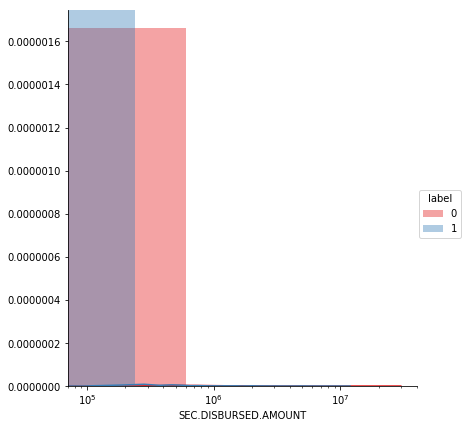

In [32]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



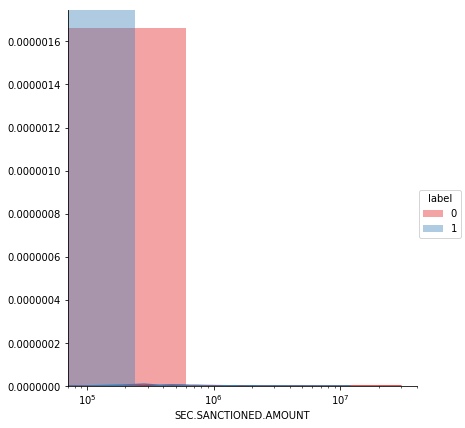

In [33]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



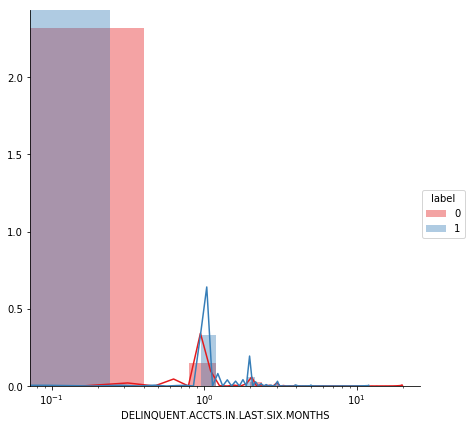

In [34]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



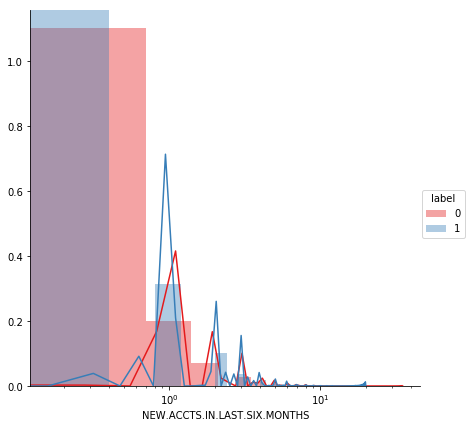

In [35]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "NEW.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



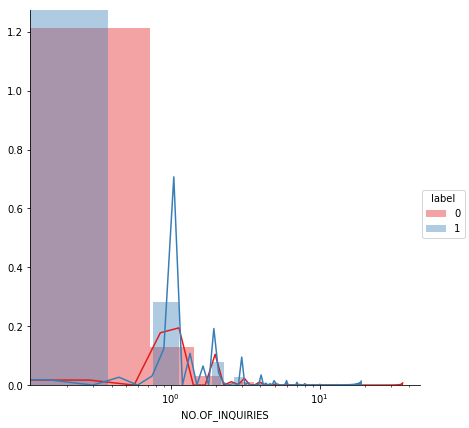

In [36]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "NO.OF_INQUIRIES") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



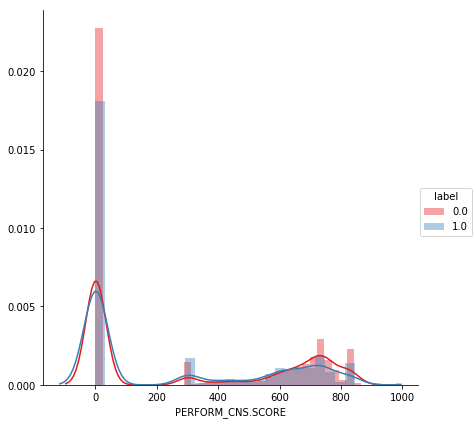

In [37]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "PERFORM_CNS.SCORE") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



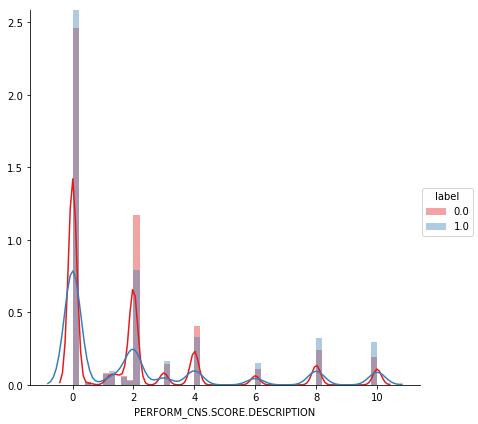

In [38]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "PERFORM_CNS.SCORE.DESCRIPTION") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



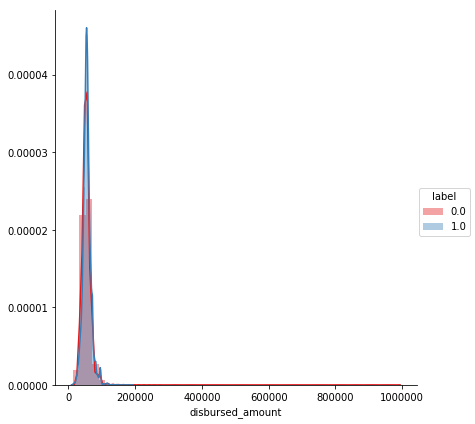

In [39]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "disbursed_amount") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



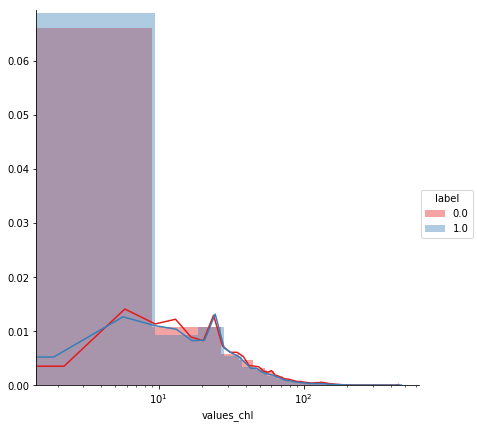

In [40]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "values_chl") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



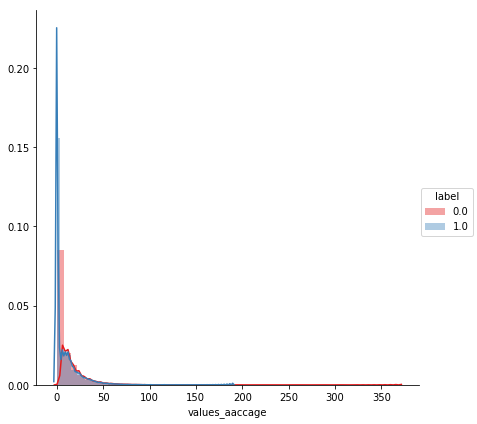

In [41]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "values_aaccage") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



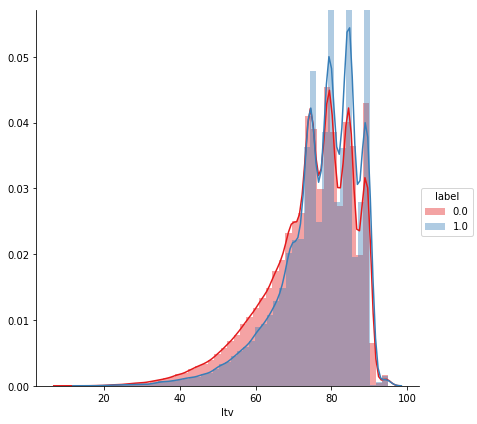

In [42]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "ltv") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



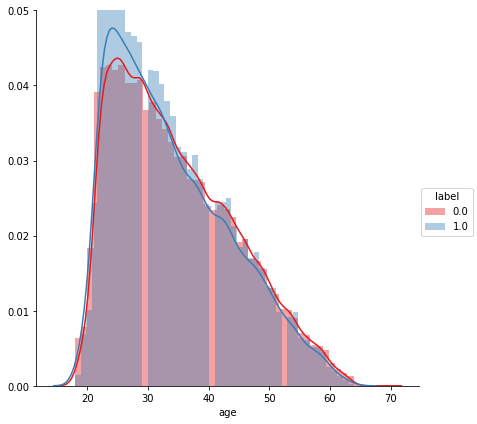

In [43]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "age") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



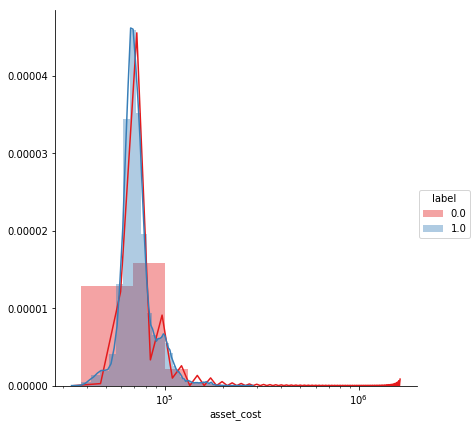

In [44]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "asset_cost") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



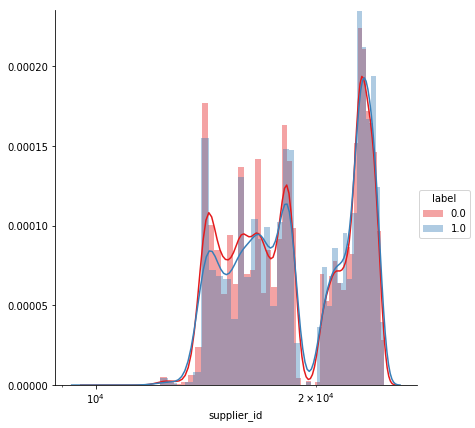

In [45]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "supplier_id") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [46]:
len(data['Employee_code_ID'].unique())

3398

In [47]:
data['Employment.Type'] = data['Employment.Type'].replace('Salaried', 0)
data['Employment.Type'] = data['Employment.Type'].replace('Self employed', 1)
data['Employment.Type'] = data['Employment.Type'].replace('Unemployed', 2)

In [48]:
trans = data.iloc[:233154,:]

In [49]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       233154 non-null object
Aadhar_flag                            233154 non-null int64
CREDIT.HISTORY.LENGTH                  233154 non-null object
Current_pincode_ID                     233154 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    233154 non-null int64
Date.of.Birth                          233154 non-null object
DisbursalDate                          233154 non-null datetime64[ns]
Driving_flag                           233154 non-null int64
Employee_code_ID                       233154 non-null int64
Employment.Type                        233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           233154 non-null int64
NO.OF_INQUIRIES                        233154 non-null int64
PAN_flag                               233154 non-null int64
PERFORM_CNS.SCORE      

In [50]:
def boxcoxTrans(data, col) : 
    from scipy.stats import boxcox
    
    databx = data[col].values
    posdata = databx[databx > 0]
    bcdata, lam = boxcox(posdata)
    x = np.empty_like(databx)
    x[databx > 0] = bcdata
    x[databx == 0] = -1/lam
    
    return x

In [ ]:
#data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
#data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
#data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
#data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
#data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
#data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])

#data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)

In [ ]:
#data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
#data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
#data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
#data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
#data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
#data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

#data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [ ]:
#data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = np.log1p(data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
#data['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = np.log1p(data['NEW.ACCTS.IN.LAST.SIX.MONTHS'])
#data['NO.OF_INQUIRIES'] = np.log1p(data['NO.OF_INQUIRIES'])
#data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
#data['values_chl'] = np.log1p(data['values_chl'])
#data['values_aaccage'] = np.log1p(data['values_aaccage'])
#data['asset_cost'] = np.log1p(data['asset_cost'])
#data['ltv'] = np.exp(data['ltv'])

In [52]:
data['PRI.NO.OF.ACCTS'] = boxcoxTrans(data, 'PRI.NO.OF.ACCTS')
data['PRI.ACTIVE.ACCTS'] = boxcoxTrans(data, 'PRI.ACTIVE.ACCTS')
data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
data['PRI.CURRENT.BALANCE'] = boxcoxTrans(data, 'PRI.CURRENT.BALANCE')
data['PRI.SANCTIONED.AMOUNT'] = boxcoxTrans(data, 'PRI.SANCTIONED.AMOUNT')
data['PRI.DISBURSED.AMOUNT'] = boxcoxTrans(data, 'PRI.DISBURSED.AMOUNT')

data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True) '''

In [53]:
data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
data['SEC.CURRENT.BALANCE'] = boxcoxTrans(data, 'SEC.CURRENT.BALANCE')
data['SEC.SANCTIONED.AMOUNT'] = boxcoxTrans(data, 'SEC.SANCTIONED.AMOUNT')
data['SEC.DISBURSED.AMOUNT'] = boxcoxTrans(data, 'SEC.DISBURSED.AMOUNT')

data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [54]:
data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = np.log1p(data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
data['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = np.log1p(data['NEW.ACCTS.IN.LAST.SIX.MONTHS'])
data['NO.OF_INQUIRIES'] = np.log1p(data['NO.OF_INQUIRIES'])
data['disbursed_amount'] = boxcoxTrans(data, 'disbursed_amount')
data['values_chl'] =boxcoxTrans(data, 'values_chl')
data['values_aaccage'] = boxcoxTrans(data, 'values_aaccage')
data['asset_cost'] = np.log1p(data['asset_cost'])
#data['ltv'] = np.exp(data['ltv'])

In [ ]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "ltv") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
data.info()

In [55]:
X = data.iloc[:233154,:]
test = data.iloc[233154:,:]

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

### Categorical Encoding

In [57]:
def responseTable(table, col) :
    cat = table[col].unique()
    
    freqP = []
    for i in cat : 
        freqP.append(len(table.loc[(table[col] == i) & (table['label'] == 1)]))
        
        
    freqN = []
    for i in cat : 
        freqN.append(len(table.loc[(table[col] == i) & (table['label'] == 0)]))
        
    
    encodedP = []
    for i in range(len(cat)) :
        encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
    
    encodedN = []
    encodedN[:] = [1 - x for x in encodedP]
        
    encodedPVAL = dict(zip(cat, encodedP)) 
    encodedNVAL = dict(zip(cat, encodedN)) 
    
    return encodedPVAL, encodedNVAL
        

In [58]:
def responseCoding(table) : 
    posBI, negBI = responseTable(table,'branch_id')
    posMI, negMI = responseTable(table,'manufacturer_id')
    posSS, negSS = responseTable(table, 'State_ID')
    posTP, negTP = responseTable(table, 'Current_pincode_ID')
    posSI, negSI = responseTable(table, 'supplier_id')
    posECI, negECI = responseTable(table, 'Employee_code_ID')

    
    df = pd.DataFrame()
    df['bid_p'] = table['branch_id'].map(posBI)
    df['bid_n'] = table['branch_id'].map(negBI)
    df['mid_p'] = table['manufacturer_id'].map(posMI)
    df['mid_n'] = table['manufacturer_id'].map(negMI)
    df['sid_p'] = table['State_ID'].map(posSS)
    df['sid_n'] = table['State_ID'].map(negSS)
    df['cpid_p'] = table['Current_pincode_ID'].map(posTP)
    df['cpid_n'] = table['Current_pincode_ID'].map(negTP)
    df['suid_p'] = table['supplier_id'].map(posSI)
    df['suid_n'] = table['supplier_id'].map(negSI)
    df['ecid_p'] = table['Employee_code_ID'].map(posECI)
    df['ecid_n'] = table['Employee_code_ID'].map(negECI)

    return df

In [59]:
newTR = responseCoding(X_train)
newTE = responseCoding(X_test)

In [60]:
final_df_tr = X_train.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)
final_df_te = X_test.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [ ]:
final_df_tr.info()

In [ ]:
final_df_tr.head()

In [ ]:
#final_df_tr = final_df_tr.reset_index()

In [ ]:
#from sklearn.impute import SimpleImputer

#imp = SimpleImputer(missing_values=np.nan, strategy='median') 
#final_df_tr = imp.fit_transform(final_df_tr)

## Stacking

In [61]:
from scipy.sparse import hstack

X_tr = hstack((final_df_tr, newTR)).tocsr()
X_te = hstack((final_df_te, newTE)).tocsr()

In [ ]:
newTR.info()

In [ ]:
X_tr.shape

In [ ]:
final_df_tr.info()

In [ ]:
#np.where(np.isnan(final_df_tr))

In [ ]:
#np.all(np.isfinite(final_df_tr))

In [ ]:
sns.FacetGrid(data, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "values_aaccage") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(X_train, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
X_train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "PRI.DISBURSED.AMOUNT", "PRI.SANCTIONED.AMOUNT") \
   .add_legend();
plt.show();


In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "SEC.DISBURSED.AMOUNT", "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.show();

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "SEC.DISBURSED.AMOUNT", "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.show();

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "SEC.DISBURSED.AMOUNT", "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.show();

In [ ]:
X_train.info()

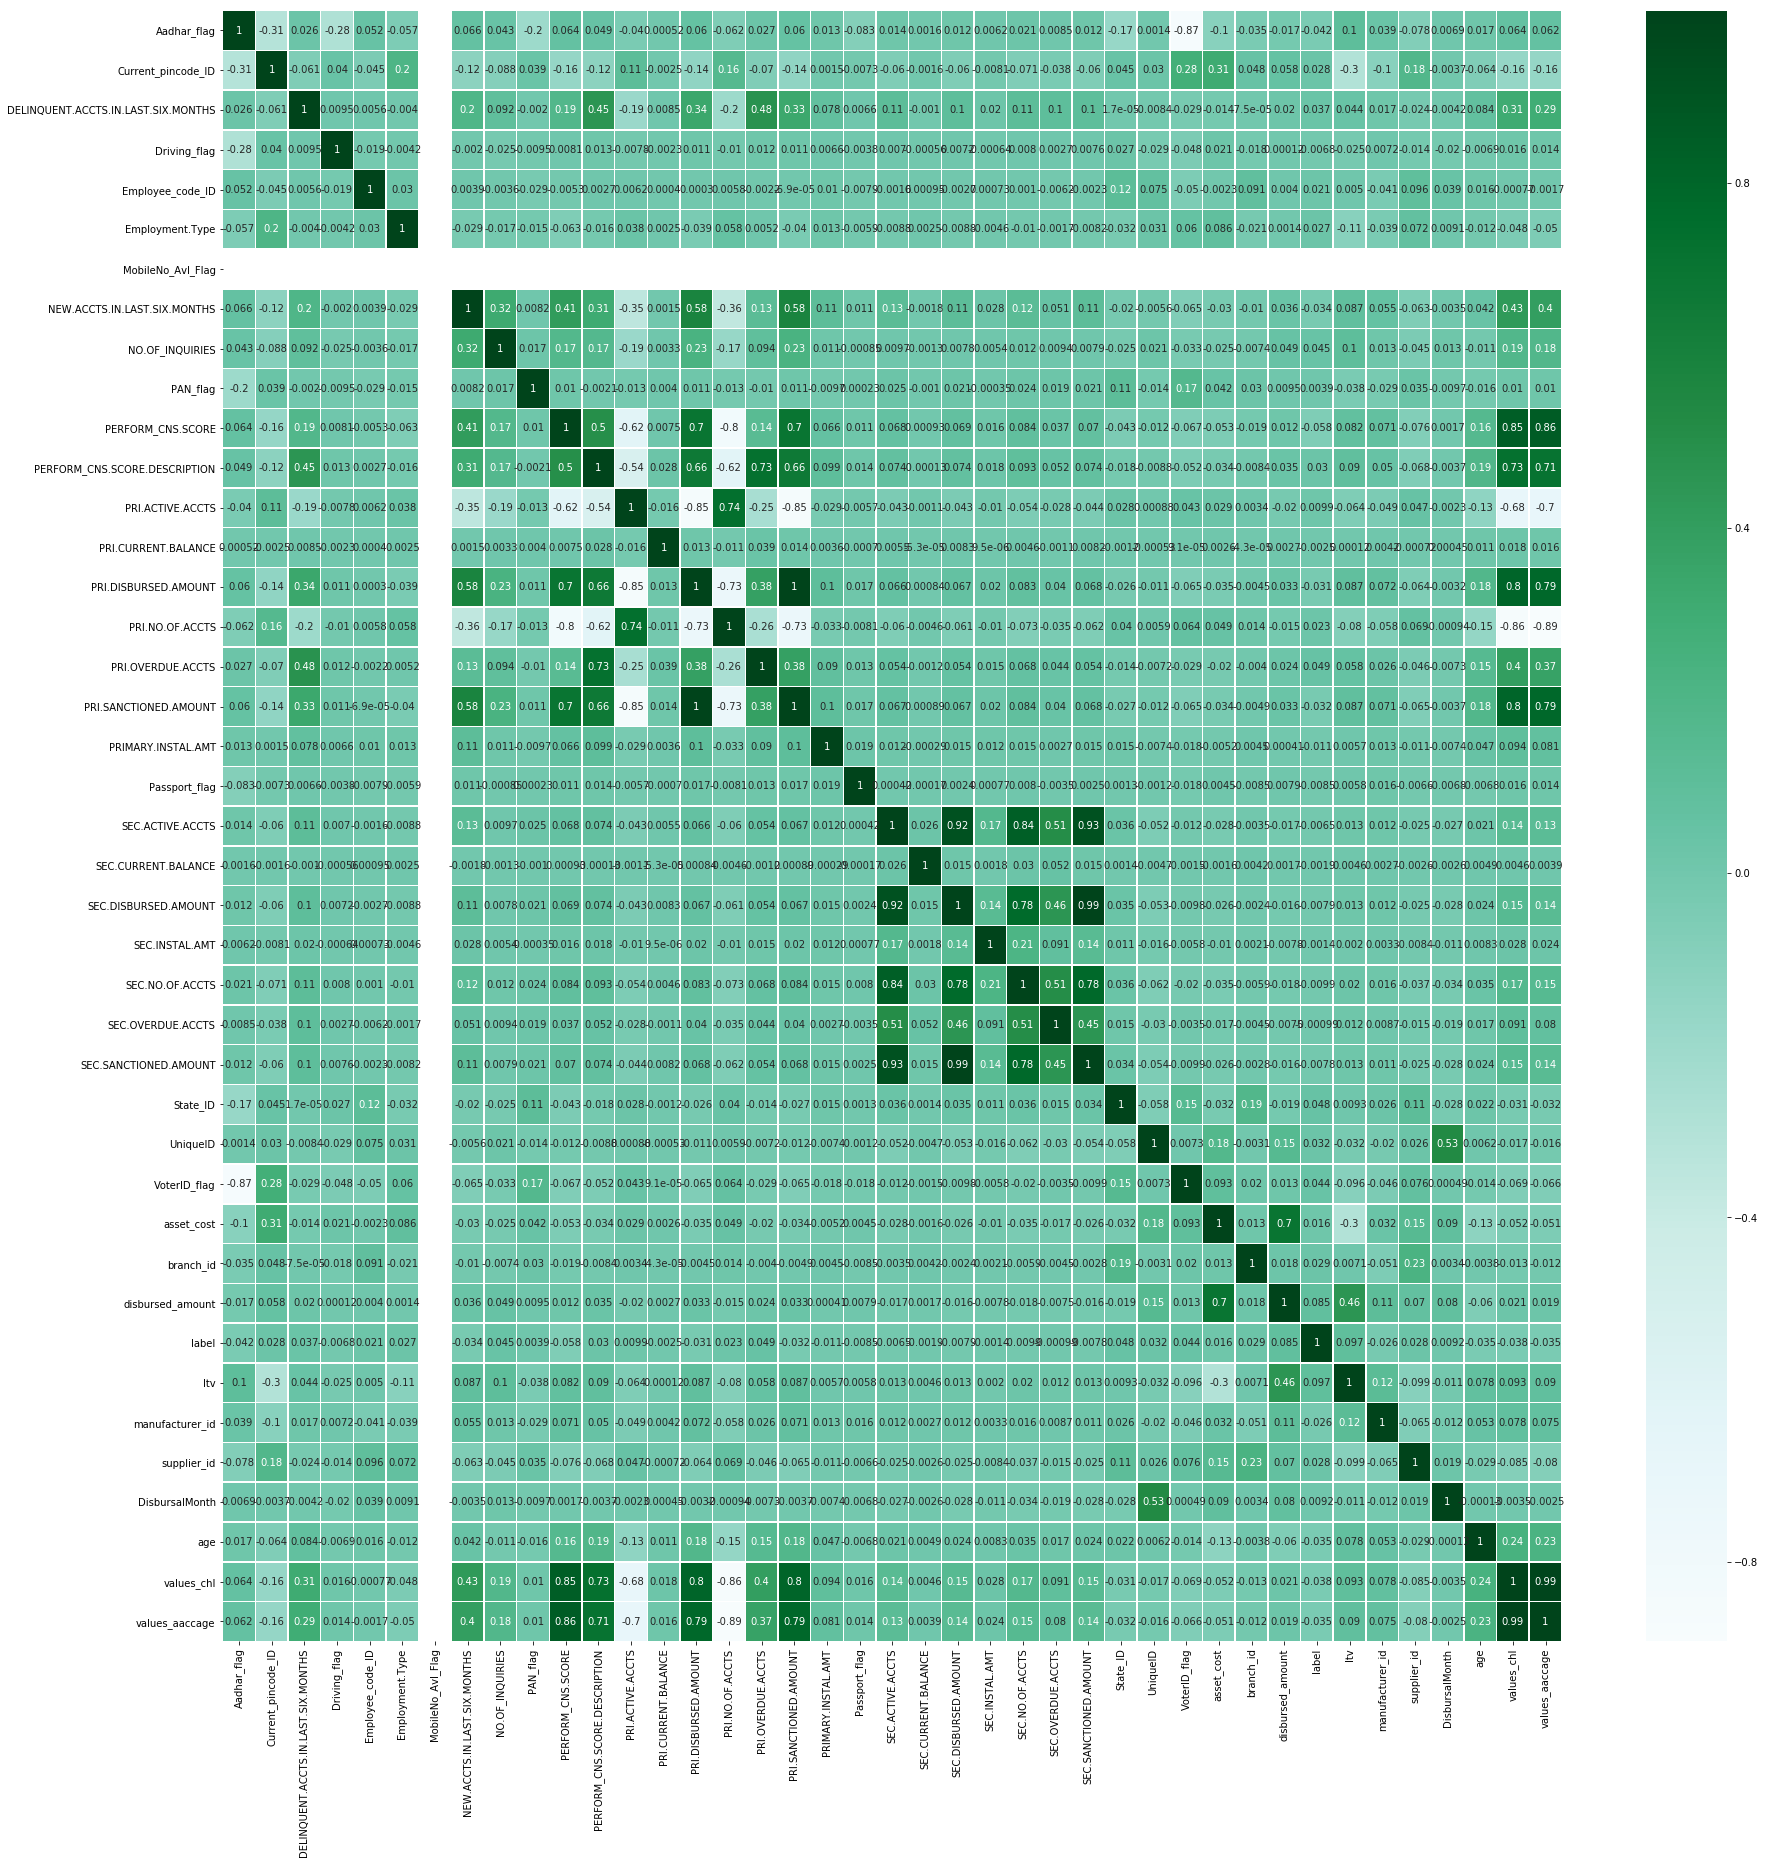

In [62]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(X_train.corr(), cmap='BuGn', annot=True, linewidths=.5, ax=ax)

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "PRI.DISBURSED.AMOUNT", "values_chl") \
   .add_legend();
plt.show();

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(X_train, hue="label", size=4) \
   .map(plt.scatter, "PRI.DISBURSED.AMOUNT", "values_aaccage") \
   .add_legend();
plt.show();

In [ ]:
trans = X_train

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(trans, hue="label", size=4) \
   .map(plt.scatter, "logfl*2logf2", "PRI.DISBURSED.AMOUNT") \
   .add_legend();
plt.show();

# Model Training

In [ ]:
dcfsdc

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
clf1 = GridSearchCV(rfc1, parameters, cv=3, scoring='roc_auc', verbose=10, n_jobs = -1)
se1 = clf1.fit(X_tr, y_train)

In [ ]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [64]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

## ROC Curve

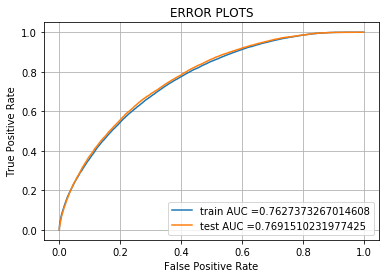

In [65]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


clf11 = RandomForestClassifier(max_depth = 10, n_estimators = 250, n_jobs = -1, class_weight = 'balanced')
#clfV1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

clf11.fit(X_tr, y_train)
#clfV1.fit(X_tr1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(clf11, X_tr)    
y_test_pred1 = batch_predict(clf11, X_te)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [ ]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## XGBoost

In [ ]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc2 = XGBClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
clf2 = GridSearchCV(rfc2, parameters, cv=3, scoring='roc_auc', n_jobs = -1, verbose=10)
se2 = clf2.fit(X_tr, y_train)

In [ ]:
import seaborn as sns; sns.set()


max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## ROC Curve

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from xgboost import XGBClassifier


clf2 = XGBClassifier(max_depth = 5, n_estimators = 250, scale_pos_weight = 3.6068300451207644, n_jobs = -1)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr)    
y_test_pred2 = batch_predict(clf2, X_te)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [ ]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### Logistic Regression

In [ ]:
X_tr

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_tr_SC = sc.fit_transform(X_tr.todense())
X_te_SC = sc.transform(X_te.todense())

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

parameters = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
#parameters = {'alpha':[0.0001, 0.0025, 0.0005, 0.0075, 0.001, 0.025, .005, 0.075, 0.1, 0.25, 0.5, 0.75, 1]} 

clf = GridSearchCV(lr1, parameters, cv=5, scoring='roc_auc', n_jobs = -1, verbose=5)
clr3 = clf.fit(X_tr_SC, y_train)

In [ ]:
train_auc3= clf.cv_results_['mean_train_score']
train_auc_std3= clf.cv_results_['std_train_score']
cv_auc3 = clf.cv_results_['mean_test_score'] 
cv_auc_std3 = clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc3, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc3 - train_auc_std3,train_auc3 + train_auc_std3,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc3, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc3 - cv_auc_std3, cv_auc3 + cv_auc_std3,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc3, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc3, label='CV AUC points')

plt.xscale('log')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

print(train_auc3)
print(cv_auc3)       #k_best = 1.0


## ROC CURVE

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


clf = LogisticRegression(C=10**-2, penalty='l1', class_weight='balanced');
clf.fit(X_tr_SC, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs


In [ ]:
y_train_pred3 = batch_predict(clf, X_tr_SC)    
y_test_pred3 = batch_predict(clf, X_te_SC)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [ ]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [ ]:
lr = LogisticRegression(C=10**-2)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

In [ ]:
newTR

In [ ]:
newTE

In [ ]:
test = test.reset_index()

In [ ]:
test.head()

In [ ]:
test.info()

In [ ]:
X.info()

In [66]:
trainRC = responseCoding(X)

In [ ]:
trainRC

In [67]:
X_filter = X[['branch_id','manufacturer_id', 'State_ID', 'Current_pincode_ID', 'supplier_id', 'Employee_code_ID']]

In [ ]:
X_filter

In [69]:
test_drop = test.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [ ]:
test_drop.head()

In [ ]:
final_df_tr.head()

In [70]:
branch_rcp = dict(zip(X_filter.branch_id, trainRC.bid_p))
branch_rcn = dict(zip(X_filter.branch_id, trainRC.bid_n))
manu_rcp = dict(zip(X_filter.manufacturer_id, trainRC.mid_p))
manu_rcn = dict(zip(X_filter.manufacturer_id, trainRC.mid_n))
sid_rcp = dict(zip(X_filter.State_ID, trainRC.sid_p))
sid_rcn = dict(zip(X_filter.State_ID, trainRC.sid_n))
cpid_rcp = dict(zip(X_filter.Current_pincode_ID, trainRC.cpid_p))
cpid_rcn = dict(zip(X_filter.Current_pincode_ID, trainRC.cpid_n))
suid_rcp = dict(zip(X_filter.supplier_id, trainRC.suid_p))
suid_rcn = dict(zip(X_filter.supplier_id, trainRC.suid_n))
ecid_rcp = dict(zip(X_filter.Employee_code_ID, trainRC.ecid_p))
ecid_rcn = dict(zip(X_filter.Employee_code_ID, trainRC.ecid_n))

In [ ]:
test[['branch_id','manufacturer_id', 'State_ID', 'Current_pincode_ID', 'supplier_id', 'Employee_code_ID']]

In [71]:
frame = pd.DataFrame()

In [72]:
frame['bid_p'] = test['branch_id'].map(branch_rcp)
frame['bid_n'] = test['branch_id'].map(branch_rcn)
frame['mid_p'] = test['manufacturer_id'].map(manu_rcp)
frame['mid_n'] = test['manufacturer_id'].map(manu_rcn)
frame['sid_p'] = test['State_ID'].map(sid_rcp)
frame['sid_n'] = test['State_ID'].map(sid_rcn)
frame['cpid_p'] = test['Current_pincode_ID'].map(cpid_rcp)
frame['cpid_n'] = test['Current_pincode_ID'].map(cpid_rcn)
frame['suid_p'] = test['supplier_id'].map(suid_rcp)
frame['suid_n'] = test['supplier_id'].map(suid_rcn)
frame['ecid_p'] = test['Employee_code_ID'].map(ecid_rcp)
frame['ecid_n'] = test['Employee_code_ID'].map(ecid_rcn)

In [ ]:
test_drop = test_drop.fillna(X_train.mean())

In [ ]:
test_drop.head()

In [ ]:
test_drop.info()

In [74]:
X_final = X.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [75]:
frame = frame.fillna(trainRC.mean())

In [76]:
X_final_fin = hstack((X_final, trainRC)).tocsr()
test_fin = hstack((test_drop, frame)).tocsr()

In [ ]:
len(y_train == 0)

In [ ]:
len([x for x in y_train if x == 0])

In [ ]:
122304/33909

In [ ]:
test_drop.info()

## ROC for TEST

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from xgboost import XGBClassifier


clf2 = XGBClassifier(max_depth = 5, n_estimators = 250, scale_pos_weight = 3.6068300451207644, n_jobs = -1)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr)    
y_test_pred2 = batch_predict(clf2, X_te)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [77]:
test_labels = clf11.predict(test_fin)

In [ ]:
test_drop

In [ ]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [ ]:
submission.head()

In [ ]:
test.info()

In [78]:
unique_id = project_data_te['UniqueID']

In [79]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': test_labels})

In [80]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


In [81]:
pd.read_csv('submission.csv')

UniqueID  loan_default
0         655269             1
1         723482             1
2         758529             1
3         763449             1
4         708663             1
5         725530             1
6         708592             1
7         714975             1
8         712795             1
9         708656             1
10        712520             0
11        753695             1
12        708646             1
13        730225             1
14        714877             1
15        769166             1
16        710254             1
17        708812             1
18        726172             1
19        716959             1
20        725935             1
21        736039             1
22        748400             1
23        753652             1
24        695108             0
25        695320             0
26        662145             0
27        688068             0
28        662099             0
29        723985             0
...          ...           ...
112362    752805             0
112363    717500             0
112364    724306             0
112365    711416             0
112366    748123             0
112367    693692             0
112368    755025             0
112369    736372             0
112370    742701             0
112371    693666             0
112372    756379             0
112373    684778             1
112374    764397             0
112375    755459             1
112376    703659             1
112377    760921             1
112378    670693             1
112379    741933             1
112380    742851             1
112381    699787             1
112382    669006             1
112383    708464             1
112384    762274             0
112385    767673             1
112386    743207             1
112387    755547             0
112388    716994             1
112389    709352             1
112390    699795             1
112391    755244             0

[112392 rows x 2 columns]

In [ ]:
project_data_tr.head()

In [ ]:
project_data_tr.info()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8,  palette="Set1") \
   .map(sns.distplot, "asset_cost") \
   .add_legend();
plt.xscale('log')
plt.show();


In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8,  palette="Set1") \
   .map(sns.distplot, "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
#plt.xscale('log')
plt.show();


In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=5) \
   .map(sns.distplot, "ltv") \
   .add_legend();
#plt.xscale('log')
plt.show();


In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6,  palette="Set1") \
   .map(sns.distplot, "PRI.NO.OF.ACCTS") \
   .add_legend();
plt.xscale('log')
plt.show();

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.ACTIVE.ACCTS") \
   .add_legend();
#plt.xscale('log')
plt.show();


In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.OVERDUE.ACCTS") \
   .add_legend();
#plt.xscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.CURRENT.BALANCE") \
   .add_legend();
#plt.xscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.NO.OF.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.ACTIVE.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.OVERDUE.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.CURRENT.BALANCE") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "PRIMARY.INSTAL.AMT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.INSTAL.AMT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "NEW.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_tr_RS = rs.fit_transform(X_tr.todense())
X_te_RS = rs.transform(X_te.todense())

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_tr_SC = sc.fit_transform(X_tr.todense())
X_te_SC = sc.transform(X_te.todense())